 ## Pyber Ride Sharing Data Analysis
 * Ride sharing has different frequencies of use and average fares depending on whether the rides are conducted in a rural, surburban, or urban area.
 * From the Ride Sharing Scatter Plot it is obvious that rides are in general more expensive but less common in rural areas than the urban areas.  The higher cost may be due to longer distances traveled or because less drivers are available as shown by the smaller numbers of drivers in the rural cities.
 * A comparison of the percentage of total fares collected and the percentage of total drivers shows that the rural drivers are collecting a higher percentage of the fares than their percentage of drivers.  And the Urban drivers are collecting a much smaller percentage of fares than their total numbers.  Therefore the average urban driver is making less money than an average rural driver despite the higher number of rides in the city.
 * As expected, the suburban areas are in between the rural and urban areas in all metrics.
 
 


In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, how="left", on=["city"])

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

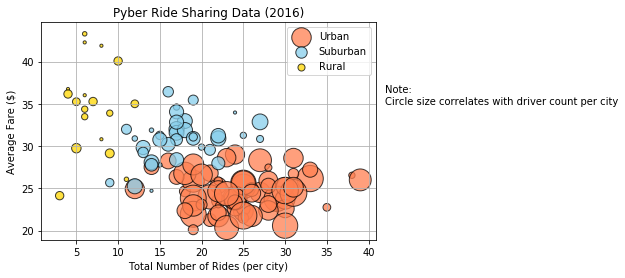

In [2]:
# Obtain the x and y coordinates for each of the three city types
# separate out the urban, suburban and rural data from each other:
rural_city_df = pyber_df.loc[pyber_df["type"] == "Rural",:]
suburb_city_df = pyber_df.loc[pyber_df["type"] == "Suburban",:]
urban_city_df = pyber_df.loc[pyber_df["type"] == "Urban",:]

# Y-Axis: Find the average fare for each city by grouping the data by city
#         then get the average for each city
rural_group = rural_city_df.groupby("city")
suburb_group = suburb_city_df.groupby("city")
urban_group = urban_city_df.groupby("city")
rural_fare_ave = rural_group["fare"].mean()
suburb_fare_ave = suburb_group["fare"].mean()
urban_fare_ave = urban_group["fare"].mean()

# X-Axis: Find the number of rides per city by counting the grouped data
rural_num_rides = rural_group["ride_id"].count()
suburb_num_rides = suburb_group["ride_id"].count()
urban_num_rides = urban_group["ride_id"].count()

# Bubble Size: Find the number of drivers in each city
rural_driver_count = rural_group["driver_count"].mean()
suburb_driver_count = suburb_group["driver_count"].mean()
urban_driver_count = urban_group["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(urban_num_rides, urban_fare_ave, marker="o", facecolors="coral", 
            edgecolors="black", s=10*urban_driver_count, alpha=0.75, label="Urban")
plt.scatter(suburb_num_rides, suburb_fare_ave, marker="o", facecolors="skyblue", 
            edgecolors="black", s=10*suburb_driver_count, alpha=0.75, label="Suburban")
plt.scatter(rural_num_rides, rural_fare_ave, marker="o", facecolors="gold", 
            edgecolors="black", s=10*rural_driver_count, alpha=0.75, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Create a legend
plt.legend(loc="upper right")
# Incorporate a text label regarding circle size
plt.text(42,35,"Note:\nCircle size correlates with driver count per city");

# Save Figure
#plt.savefig("Pyber_RideShare_Data.png")

## Total Fares by City Type

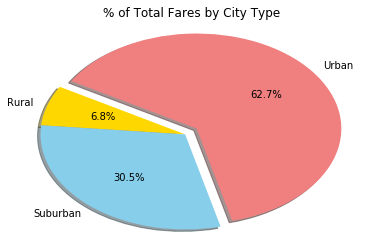

In [3]:
# Calculate Type Percents (the plt.pie function calculates the percents for us)
rural_df = pyber_df[pyber_df["type"] == "Rural"]
suburb_df = pyber_df[pyber_df["type"] == "Suburban"]
urban_df = pyber_df[pyber_df["type"] == "Urban"]

rural_fare_sum = rural_df["fare"].sum()
suburb_fare_sum = suburb_df["fare"].sum()
urban_fare_sum = urban_df["fare"].sum()

total_fares = [rural_fare_sum, suburb_fare_sum, urban_fare_sum]
city_type = ["Rural", "Suburban", "Urban"]
type_colors = ["gold", "skyblue", "lightcoral"]                            

# Tells matplotlib to separate the urban section
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(total_fares, explode=explode, labels=city_type, colors=type_colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("auto")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Pyber_Total_Fares.png")
plt.show()

## Total Rides by City Type

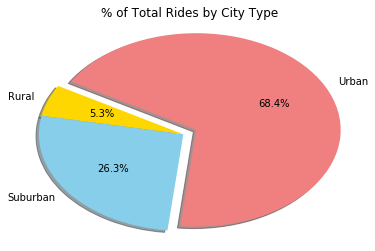

In [4]:
# Calculate Ride Percents
rural_rides_count = rural_df["ride_id"].count()
suburb_rides_count = suburb_df["ride_id"].count()
urban_rides_count = urban_df["ride_id"].count()

total_rides = [rural_rides_count, suburb_rides_count, urban_rides_count]               

# Tells matplotlib to separate the urban section
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(total_rides, explode=explode, labels=city_type, colors=type_colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("auto")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Pyber_Total_Rides.png")
plt.show()

## Total Drivers by City Type

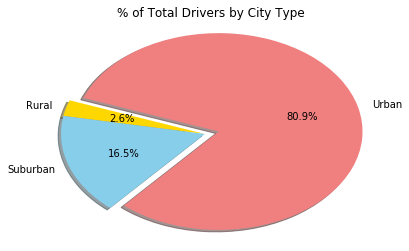

In [5]:
# Calculate Driver Percents
rural_driver_sum = rural_driver_count.sum()
suburb_driver_sum = suburb_driver_count.sum()
urban_driver_sum = urban_driver_count.sum()

total_drivers = [rural_driver_sum, suburb_driver_sum, urban_driver_sum]                           

# Tells matplotlib to separate the urban section
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(total_drivers, explode=explode, labels=city_type, colors=type_colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("auto")
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Pyber_Total_Drivers.png")
plt.show()